In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv", header=None)

df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


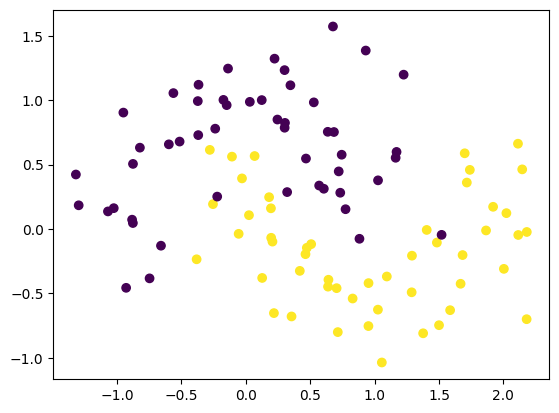

In [5]:
plt.scatter(df[0], df[1],c=df[2])
plt.show()

In [6]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

## Manually

In [8]:
model = Sequential([
    Dense(10, activation="tanh", input_dim=2),
    Dense(10, activation="tanh"),
    Dense(10, activation="tanh"),
    Dense(10, activation="tanh"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.get_weights()

[array([[ 0.06829661, -0.19985056, -0.5426545 , -0.24934211, -0.6469197 ,
         -0.28943926,  0.13032228,  0.49657148, -0.23139006,  0.41491872],
        [ 0.08376515, -0.47516203,  0.10645956, -0.04018128, -0.2934599 ,
          0.4312287 ,  0.08558911,  0.19803387,  0.6520173 ,  0.5184937 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.48160672,  0.24662012,  0.27585995, -0.4743737 , -0.41464567,
          0.35286015,  0.22067809,  0.05251789,  0.23660094, -0.16955864],
        [-0.5012475 , -0.3334673 , -0.16656286, -0.35386032,  0.12622905,
          0.2873233 , -0.15163162,  0.37939066,  0.21507692,  0.4268338 ],
        [-0.3704218 , -0.3191761 ,  0.5054933 , -0.18762395,  0.01620668,
          0.13520807, -0.41423237,  0.44291002, -0.39744568,  0.30139732],
        [ 0.46257102,  0.3234979 ,  0.53307605, -0.48399183,  0.33511138,
          0.53840506,  0.03551775, -0.37654543,  0.02407455, -0.34793207],
        [ 0.54255

In [10]:
## initialize the Xavier Weights ##

initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(2, 10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1) * np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

model.get_weights()

[array([[ 0.7085958 ,  0.49390653, -0.15617633, -0.22514266,  0.8978825 ,
         -0.6199144 ,  0.54975396, -0.9798398 ,  0.69111407, -1.5264122 ],
        [ 0.10724567, -0.28893158, -0.28328297, -0.24165854, -0.32769844,
         -0.43071887,  0.17632288, -0.03628969, -0.18871425,  0.54422724]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 2.36713544e-01,  5.29173799e-02,  1.18635915e-01,
         -2.46627375e-01,  3.59486416e-02,  1.06000744e-01,
         -1.00143857e-01, -1.88131586e-01,  2.41138056e-01,
         -2.99763113e-01],
        [-2.69849420e-01, -6.19752854e-02, -7.85444453e-02,
          2.21864581e-01, -1.58976942e-01,  2.82447726e-01,
         -7.11314738e-01,  6.19679391e-01, -3.22410077e-01,
         -1.89130024e-05],
        [ 3.23982537e-01, -1.39392361e-01,  8.20577964e-02,
          5.90088665e-01, -2.16472775e-01, -2.95880079e-01,
         -3.81311268e-01, -4.03811693e-01,  4.15047526e-01,
         -2.3416000

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 78ms/step - loss: 0.7032 - accuracy: 0.4000 - val_loss: 0.7034 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6898 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6860 - accuracy: 0.6000 - val_loss: 0.6762 - val_accuracy: 0.7000
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6783 - accuracy: 0.7125 - val_loss: 0.6638 - val_accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6708 - accuracy: 0.7000 - val_loss: 0.6522 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6649 - accuracy: 0.7000 - val_loss: 0.6413 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6581 - accuracy: 0.6875 - val_loss: 0.6318 - val_accuracy: 0.8500
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 14ms/step - loss: 0.4006 - accuracy: 0.8500 - val_loss: 0.3073 - val_accuracy: 0.8500
Epoch 60/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3979 - accuracy: 0.8500 - val_loss: 0.3049 - val_accuracy: 0.8500
Epoch 61/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3958 - accuracy: 0.8500 - val_loss: 0.3023 - val_accuracy: 0.8500
Epoch 62/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3936 - accuracy: 0.8500 - val_loss: 0.3000 - val_accuracy: 0.9000
Epoch 63/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3919 - accuracy: 0.8500 - val_loss: 0.2982 - val_accuracy: 0.9000
Epoch 64/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3898 - accuracy: 0.8500 - val_loss: 0.2957 - val_accuracy: 0.9000
Epoch 65/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3879 - accuracy: 0.8500 - val_loss: 0.2942 - val_accuracy: 0.9000
Epoch 66/100
3/3 [========

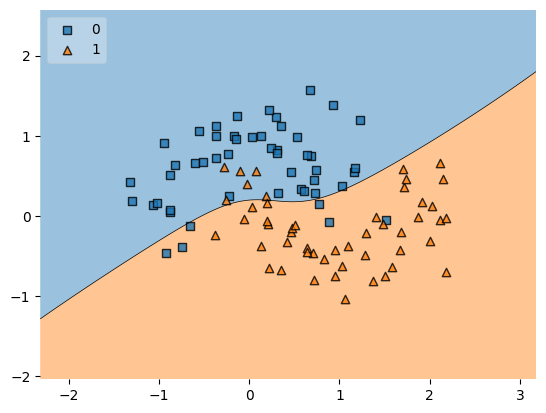

In [14]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.show()

## Using Keras

In [15]:
# possible initializers = he_normal, he_uniform, glorat_normal, glorat_uniform
# default is glorat_uniform
model = Sequential([
    Dense(10, activation="relu", input_dim=2, kernel_initializer="he_normal"),
    Dense(10, activation="relu", kernel_initializer="he_normal"),
    Dense(10, activation="relu", kernel_initializer="he_normal"),
    Dense(10, activation="relu", kernel_initializer="he_normal"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.get_weights()

[array([[ 0.1623321 , -1.4236739 , -0.52770615, -0.03012584,  1.289929  ,
          0.04150473, -1.9681042 ,  1.5075812 , -0.74688345,  0.4736957 ],
        [ 0.49147967,  1.0123569 , -0.9273862 ,  2.157834  ,  1.4175311 ,
          0.13412775,  1.617389  , -0.65449756,  1.1090497 , -0.4623455 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.26456717, -0.1613546 ,  0.09246474, -0.43107522, -0.0633163 ,
          0.64318115, -0.55867976, -0.8347624 ,  0.85096586, -0.17210267],
        [ 0.08924907,  0.3469701 ,  0.2958651 ,  0.18534757,  0.00718115,
         -0.43563735, -0.18661493, -0.4376533 ,  0.4168652 ,  0.27079323],
        [ 0.05453289,  0.2364567 ,  0.04440744, -0.27785978,  0.19587846,
          0.8871037 , -0.4636494 ,  0.6273379 ,  0.935169  ,  0.829494  ],
        [ 0.03956459, -0.03646468, -0.15430751, -0.61758214, -0.08244054,
         -0.28300604, -0.36646017, -0.50020665,  0.728757  , -0.47604382],
        [ 0.56443

In [17]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X, y, epochs = 100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 62ms/step - loss: 0.6477 - accuracy: 0.7125 - val_loss: 0.6464 - val_accuracy: 0.7000
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6324 - accuracy: 0.7125 - val_loss: 0.6281 - val_accuracy: 0.7500
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6190 - accuracy: 0.7250 - val_loss: 0.6119 - val_accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6064 - accuracy: 0.7500 - val_loss: 0.5978 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5955 - accuracy: 0.7500 - val_loss: 0.5859 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5855 - accuracy: 0.7750 - val_loss: 0.5755 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5772 - accuracy: 0.7750 - val_loss: 0.5661 - val_accuracy: 0.8500
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 16ms/step - loss: 0.3308 - accuracy: 0.8625 - val_loss: 0.2229 - val_accuracy: 0.9500
Epoch 60/100
3/3 [==============================] - 0s 19ms/step - loss: 0.3293 - accuracy: 0.8625 - val_loss: 0.2216 - val_accuracy: 0.9500
Epoch 61/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3283 - accuracy: 0.8625 - val_loss: 0.2209 - val_accuracy: 0.9500
Epoch 62/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3268 - accuracy: 0.8625 - val_loss: 0.2196 - val_accuracy: 0.9500
Epoch 63/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3256 - accuracy: 0.8625 - val_loss: 0.2182 - val_accuracy: 0.9500
Epoch 64/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3244 - accuracy: 0.8750 - val_loss: 0.2166 - val_accuracy: 0.9500
Epoch 65/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3237 - accuracy: 0.8750 - val_loss: 0.2161 - val_accuracy: 0.9500
Epoch 66/100
3/3 [========

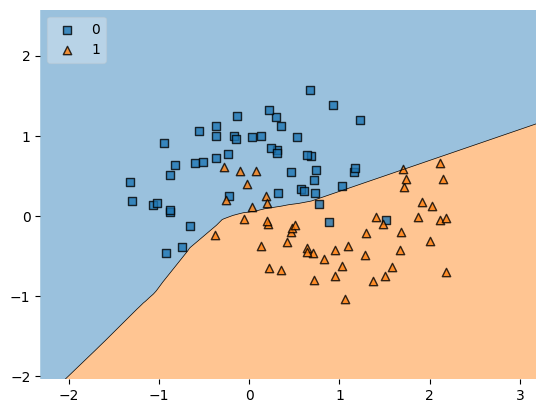

In [18]:
plot_decision_regions(X, y.astype("int"), clf=model, legend=2)
plt.show()